# Gaussian XOR and Gaussian R-XOR Experiment 
## Some observations from the experiment 
- generalization error: ODIF clearly outperforms RF when RXOR data is introduced. ie. generalization error continues to drop for ODIF
- ODIF shows forward and backward transfer capabilities
- In order to limit runtime I used mc_rep = 200 (the number of repetitions to run omnidirectional learning algorithm for). In the actual experiment mc_rep=1000. 

## Observations regarding experiment design/and tutorial structure
- intuition/background info first for context 
- XOR is a classic experiment for ML/ most people using this tutorial will be familiar with XOR and have probably used similar examples for evaluating other algorithms.
- clear figures

In [ ]:
import proglearn as PL
import numpy as np

import functions.xor_rxor_functions as fn
from proglearn.sims import generate_gaussian_parity


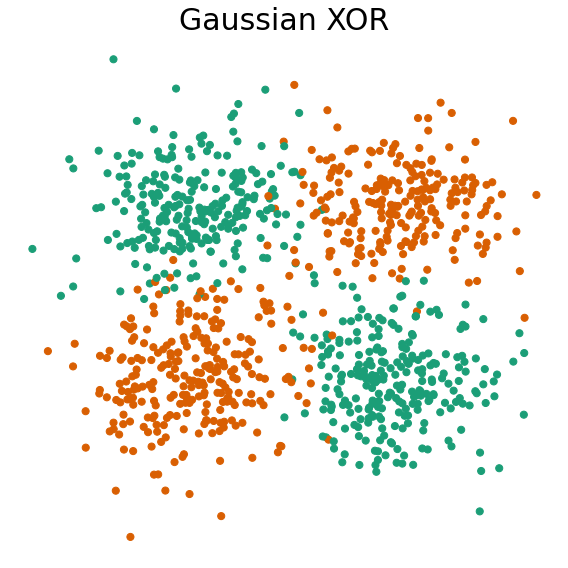

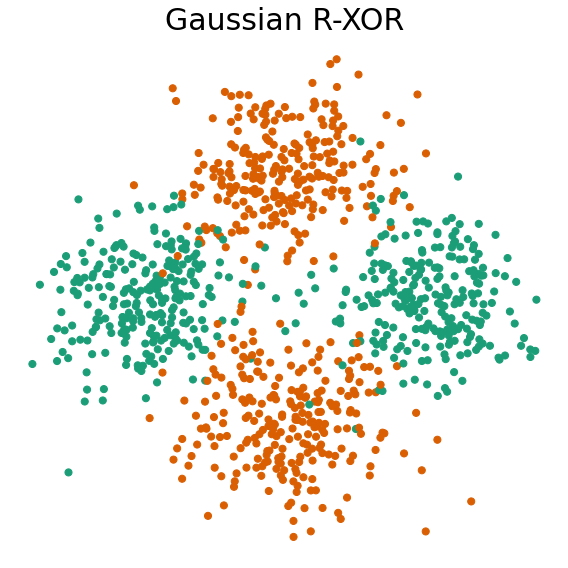

In [ ]:

# call function to return gaussian xor and rxor data:
X_xor, y_xor = generate_gaussian_parity(1000)
X_rxor, y_rxor = generate_gaussian_parity(1000, angle_params=np.pi/4)

# plot and format:
fn.plot_xor_rxor(X_xor, y_xor, 'Gaussian XOR')
fn.plot_xor_rxor(X_rxor, y_rxor, 'Gaussian R-XOR')

In [ ]:
# define hyperparameters:
mc_rep = 200
n_test = 1000
n_trees = 10
n_xor = (100*np.arange(0.5, 7.50, step=0.25)).astype(int)
n_rxor = (100*np.arange(0.25, 7.50, step=0.25)).astype(int)

In [ ]:
# running the experiment:

# create empty arrays for storing results
mean_error = np.zeros((6, len(n_xor)+len(n_rxor)))
std_error = np.zeros((6, len(n_xor)+len(n_rxor)))
mean_te = np.zeros((4, len(n_xor)+len(n_rxor)))
std_te = np.zeros((4, len(n_xor)+len(n_rxor)))

# run the experiment
mean_error, std_error, mean_te, std_te = fn.run(mc_rep, n_test, n_trees,n_xor,n_rxor, mean_error, std_error, mean_te, std_te)

/usr/local/lib/python3.7/dist-packages/google/colab/_event_manager.py:28: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  func(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/IPython/core/pylabtools.py:125: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  fig.canvas.print_figure(bytes_io, **kw)


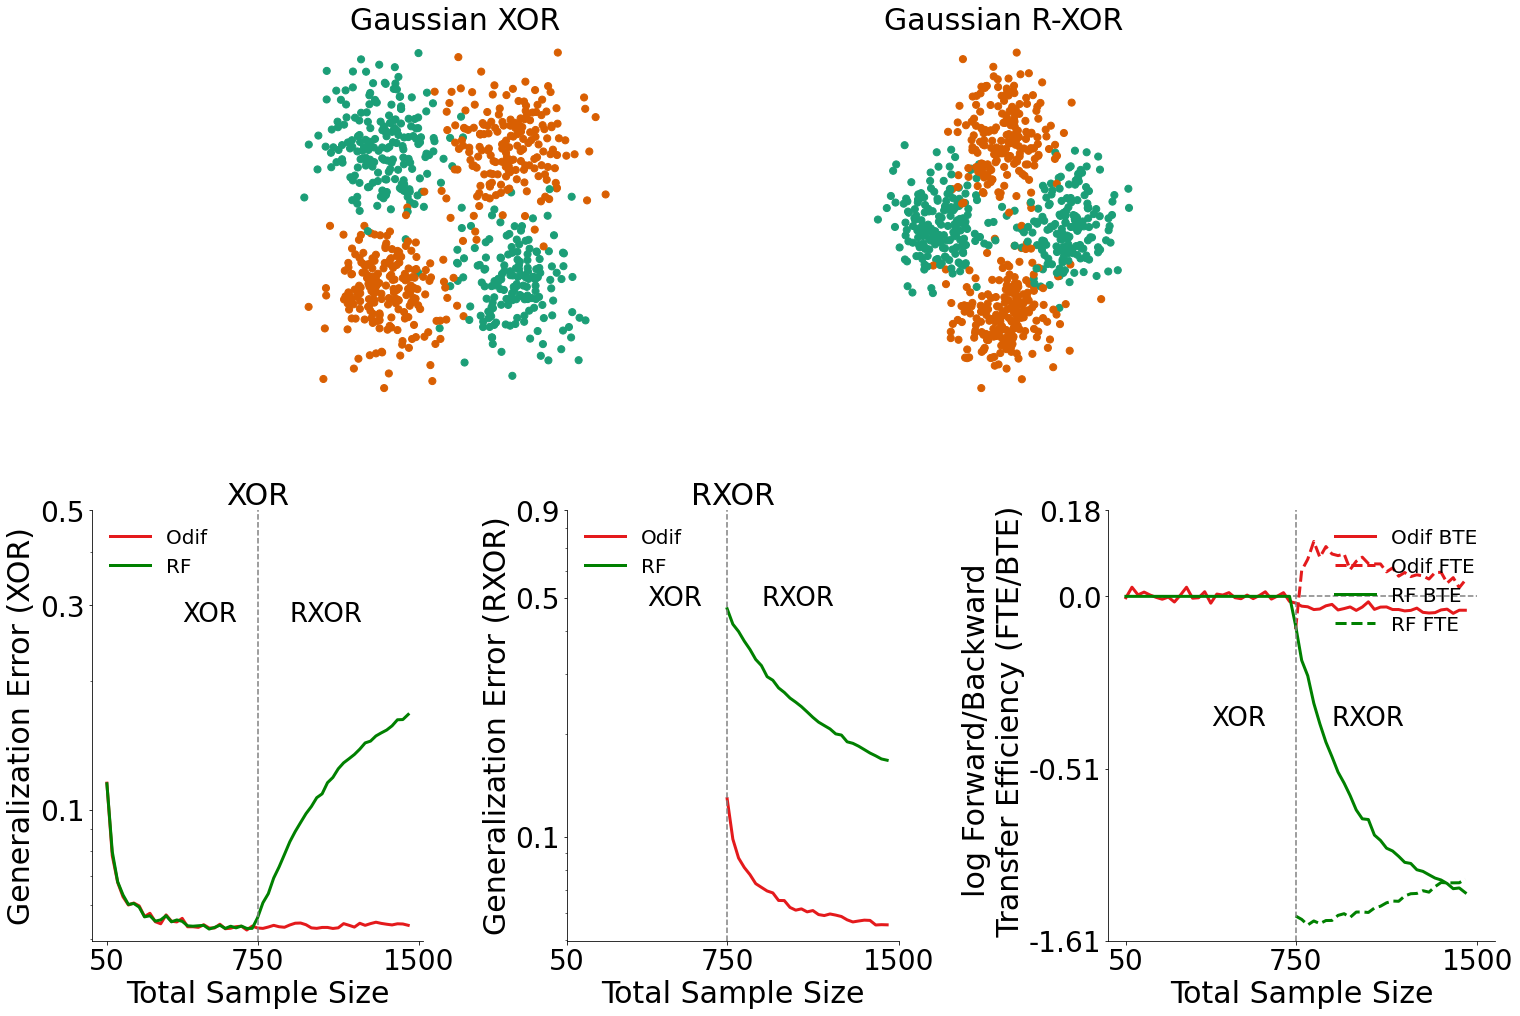

In [ ]:
# plot data
%matplotlib inline
fn.plot_error_and_eff(n_xor, n_rxor, mean_error, mean_te, 'XOR', 'RXOR')

# Various Angles vs BTE

In [ ]:
angle_sweep = range(0,90,1)
task1_sample = 100
task2_sample = 100
mc_rep = 100 #reduce the number of repetitions for reduced runtime

In [ ]:
mean_te = fn.bte_v_angle(angle_sweep, task1_sample, task2_sample, mc_rep)

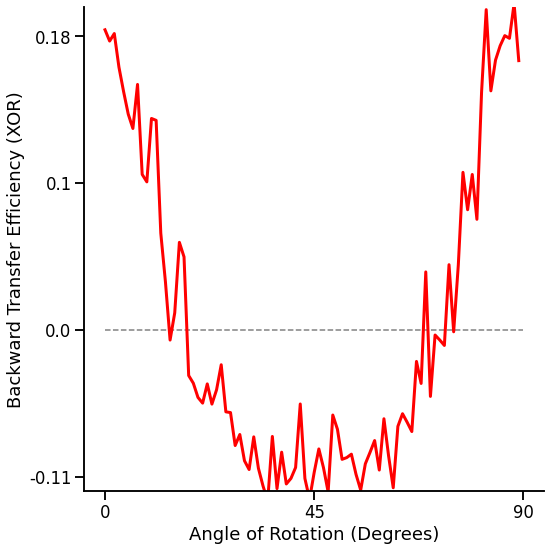

In [ ]:
fn.plot_bte_v_angle(mean_te)